# Calcul du nombre moyen de coformes pour les paradigmes
1. paradigme morphosyntaxique
1. paradigme morphomique

In [3]:
import pandas as pd
import glob,re
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_palette("husl")

### Emplacement des données

In [6]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"DerivationParadigmes/"

In [7]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"FlexionAdjectifs/"

In [8]:
baseRepName="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/"
repName=baseRepName+"GroupeSepare/"

### Assemblage d'une ligne
- moyenne, médiane, Q1, Q3

In [9]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        elif magnitude>=0:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        else:
            unit=""
            value="0"
        text="%s%s"%(value,unit)
    return text

In [10]:
def arrondi(n):
   return int(round(n,0)) 

In [11]:
def getPoint(df):
    df.drop('None', axis=1, inplace=True)
    df.drop(df.index[[0,1]],inplace=True)
    s=df.apply(pd.to_numeric).stack()
    mean=arrondi(s.mean())
    median=arrondi(s.median())
    nmin=s.min()
    nmax=s.max()
    q1=arrondi(s.quantile(0.25))
    q3=arrondi(s.quantile(0.75))
    return [mean, median, q1,q3,nmin,nmax]

In [12]:
def getTokensForms(nomFichier):
    m=re.search(ur"-T(\d+)-",nomFichier)
    if m:
        nbTokens=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbTokens=pd.NaT
    m=re.search(ur"-F(\d+)-",nomFichier)
    if m:
        nbForms=int(m.group(1))
    else:
        print "pas de nombre de Tokens dans le nom de fichier"
        nbForms=pd.NaT
    return [nbTokens,nbForms]

In [13]:
def getData(serie,rep=repName):
    data={}
    for numMSP,msp in enumerate(glob.glob(rep+"*%s.csv"%serie)):
        dataLine=getTokensForms(msp)
        pdMSP=pd.read_csv(filepath_or_buffer=msp,sep=";")
        dataLine.extend(getPoint(pdMSP))
        data[int((numMSP+1))]=dataLine
    return data

In [14]:
glob.glob(repName+"*%s.csv"%"Separe")

['/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-45-T460000-F30160-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-07-T80000-F13155-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-74-T3000000-F53894-180112-052621-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-103-T14000000-F67196-180112-054154-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-20-T210000-F21393-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-110-T21000000-F68931-180112-054153-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/GroupeSepare/Longitudinal-124-T80000000-F72279-180116-155314-Separe.csv',
 '/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitu

In [15]:
def getSerie(serie):
    serieInitial=serie[0]
    parSerie=pd.DataFrame.from_dict(getData(serie),orient="index",dtype=int).sort_index()
    parSerie.columns=["tokens","forms"+serieInitial,"mean"+serieInitial,"median"+serieInitial,"Q1"+serieInitial,"Q3"+serieInitial,"min","max"]
    parSerie.set_index("tokens",inplace=True)
    return parSerie

In [16]:
parOMP=getSerie("Groupe")
parMSP=getSerie("Separe")

In [17]:
datapoints=[30000,130000,500000,2000000,8000000,32000000,130000000]
parMSP[parMSP.index.isin(datapoints)].sort_index()

,formsS,meanS,medianS,Q1S,Q3S,min,max
tokens,,,,,,,
30000,7497,29,10,2,29,0,1093
130000,16948,85,29,5,94,0,1985
500000,31170,182,62,9,222,0,2965
2000000,48789,342,146,28,455,0,3866
8000000,63534,500,256,49,690,1,4413
130000000,72864,622,403,65,879,3,4698


In [23]:
parMSP[parMSP["Q1S"]>56].sort_index()

,formsS,meanS,medianS,Q1S,Q3S,min,max
tokens,,,,,,,
14000000,67196,546,303,57,769,2,4530
15000000,67525,550,309,58,777,2,4535
16000000,67823,554,315,58,780,2,4542
17000000,68097,557,321,59,785,2,4548
18000000,68321,560,323,60,793,3,4559
19000000,68546,563,325,60,798,3,4566
20000000,68760,566,329,61,800,3,4570
21000000,68931,568,332,61,804,3,4575
22000000,69080,570,335,61,809,3,4576


In [18]:
parOMP[parOMP.index.isin(datapoints)].sort_index()

,formsG,meanG,medianG,Q1G,Q3G,min,max
tokens,,,,,,,
30000,7497,62,25,9,63,1,1093
130000,16948,144,59,14,163,2,1985
500000,31170,266,104,14,335,1,2965
2000000,48789,455,266,28,611,2,3866
8000000,63534,663,493,47,984,2,4413
130000000,72864,805,658,63,1214,4,4698


In [50]:
parOMP[parOMP["Q1G"]>56].sort_index()

,formsG,meanG,medianG,Q1G,Q3G,min,max
tokens,,,,,,,
22000000,69080,748,604,57,1139,3,4576
23000000,69221,751,608,57,1141,3,4581
24000000,69370,753,608,57,1147,3,4583
25000000,69523,755,611,57,1152,3,4589
26000000,69676,758,615,57,1154,3,4597
27000000,69795,760,616,58,1156,3,4602
28000000,69897,761,616,58,1159,4,4606
29000000,70013,763,621,58,1159,4,4611
30000000,70110,765,622,58,1164,4,4613


[0.10000000000000001, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]


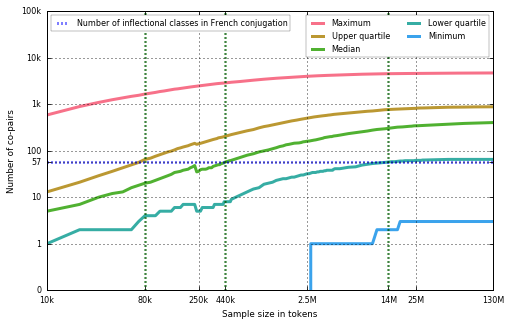

In [42]:
sns.set_style(None)
ax=parMSP.sort_index()[["max","Q3S","medianS","Q1S","min"]].plot(figsize=(8,5),linewidth=3)
ax.set_yscale("log")
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of co-pairs")#,fontsize=16)
ax.set_ylim(1,10000)
ax.set_xscale("log")
ticksY=list(plt.yticks()[0])
print ticksY
plt.yticks(ticksY)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(57,linestyle=":",label="57",linewidth=3)
ax.axvline(80000,linestyle=":",linewidth=3,c="green")
ax.axvline(440000,linestyle=":",linewidth=3,c="green")
ax.axvline(14000000,linestyle=":",linewidth=3,c="green")
plt.yticks(list(plt.yticks()[0]) + [57])
handles, labels = ax.get_legend_handles_labels()
labels=["Maximum","Upper quartile", "Median", "Lower quartile","Minimum"]
legend1=ax.legend(handles[:-1], labels, loc=1,ncol=2)
ax.legend(handles[-1:],["Number of inflectional classes in French conjugation"],loc=2)
ax.add_artist(legend1)
#rows=[32000,80000,125000,440000,500000,2000000,8000000,30000000,130000000]
rows=[10000,80000,250000,440000,2500000,14000000,25000000,130000000]
plt.xticks(rows)
plt.grid()
plt.minorticks_off()
#colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
#plt.table(rowLabels=rows,rowColours=colors,colLabels=["Q1S","medianS","Q3S"],loc='bottom')
plt.savefig("Copairs.png",dpi=300, bbox_inches="tight")

[0.10000000000000001, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]


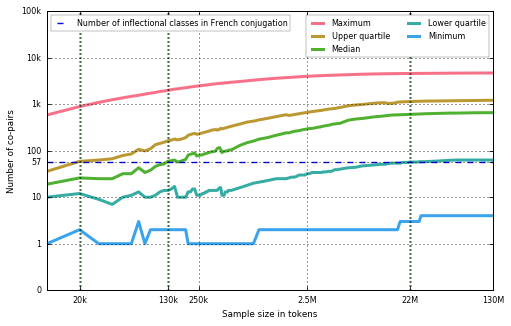

In [62]:
sns.set_style(None)
ax=parOMP.sort_index()[["max","Q3G","medianG","Q1G","min"]].plot(figsize=(8,5),linewidth=3)
ax.set_yscale("log")
ax.set_xlabel("Sample size in tokens")#,fontsize=16)
ax.set_ylabel("Number of co-pairs")#,fontsize=16)
ax.set_ylim(1,10000)
ax.set_xscale("log")
ax.axvline(20000,linestyle=":",linewidth=3,c="green")
ax.axvline(130000,linestyle=":",linewidth=3,c="green")
ax.axvline(22000000,linestyle=":",linewidth=3,c="green")
ticksY=list(plt.yticks()[0])
print ticksY
plt.yticks(ticksY)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.axhline(57,linestyle="--",label="57")
#ax.axhline(3,linestyle="--",label="3")
plt.yticks(list(plt.yticks()[0]) + [57])
handles, labels = ax.get_legend_handles_labels()
labels=["Maximum","Upper quartile", "Median", "Lower quartile","Minimum"]
legend1=ax.legend(handles[:-1], labels, loc=1,ncol=2)
ax.legend(handles[-1:],["Number of inflectional classes in French conjugation"],loc=2)
ax.add_artist(legend1)
rows=[20000,130000,250000,2500000,22000000,130000000]
plt.xticks(rows)
plt.grid()
plt.minorticks_off()
#colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
#plt.table(rowLabels=rows,rowColours=colors,colLabels=["Q1S","medianS","Q3S"],loc='bottom')
plt.savefig("Copairs-OMP.png",dpi=300, bbox_inches="tight")

In [1]:
parOMP.sort_index()[["max","Q3G","medianG","Q1G","min"]].

SyntaxError: invalid syntax (<ipython-input-1-6fdab02be79a>, line 1)

In [93]:
parCOMP=parMSP.join(parOMP)
parCOMP.drop("formsG",axis=1,inplace=True)
parCOMP.columns=["Forms","mean MSP","median MSP","Q1 MSP","Q3 MSP","mean OMP","median OMP","Q1 OMP","Q3 OMP"]

(<matplotlib.axes._subplots.AxesSubplot at 0x11737ea50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1180e2fd0>)

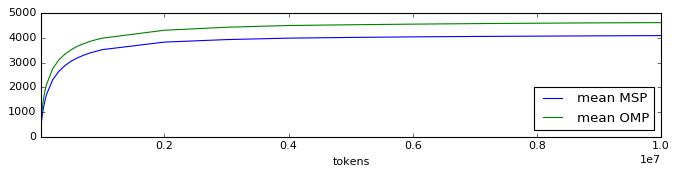

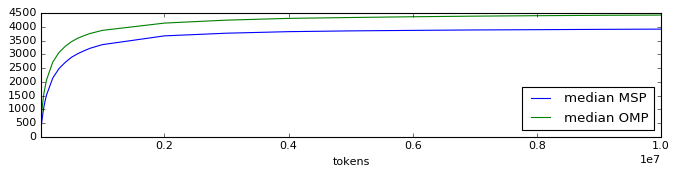

In [94]:
parCOMP[0:28][["mean MSP","mean OMP"]].plot(figsize=(10,2),logx=False),parCOMP[0:28][["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118959950>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118ba4a50>)

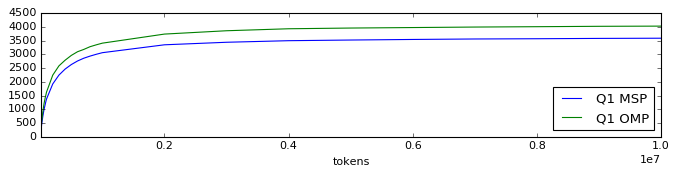

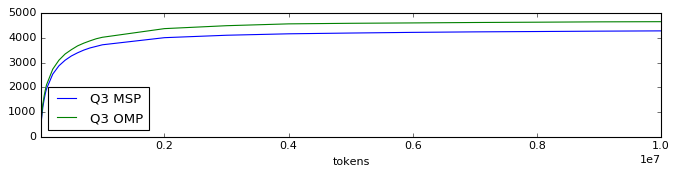

In [95]:
parCOMP[["Q1 MSP","Q1 OMP"]].plot(figsize=(10,2)),parCOMP[["Q3 MSP","Q3 OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118c135d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x118e59590>)

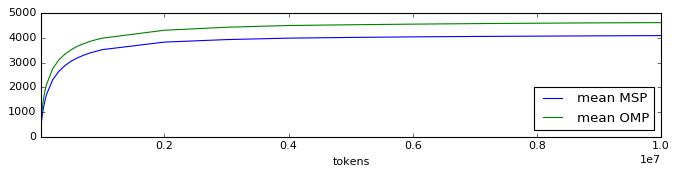

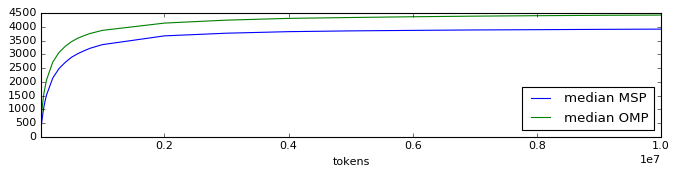

In [96]:
parCOMP[["mean MSP","mean OMP"]].plot(figsize=(10,2)),parCOMP[["median MSP","median OMP"]].plot(figsize=(10,2))

(<matplotlib.axes._subplots.AxesSubplot at 0x118edd490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1176354d0>)

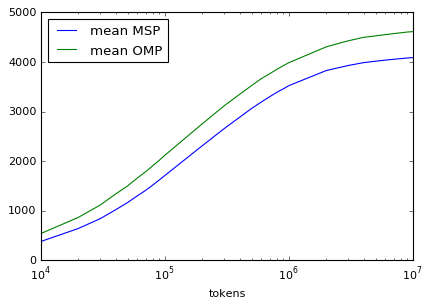

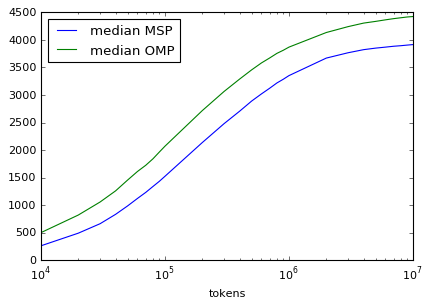

In [97]:
parCOMP[["mean MSP", "mean OMP"]].plot(logx=True),parCOMP[["median MSP", "median OMP"]].plot(logx=True)